# 定义可视化辅助函数

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR。matplotlib可视化格式为RGB，因此需将BGR转化为RGB'''
    img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 调用摄像头拍摄图片

In [3]:
import time
import cv2

time.sleep(2)   #运行本代码后两秒钟拍照

#获取摄像头，0为电脑默认摄像头，1为外接摄像头
cap = cv2.VideoCapture(0)
#从摄像头获取一帧画面
success,image = cap.read()

#关闭摄像头
cap.release()
#关闭图像窗口
cv2.destroyAllWindows()

cv2.imwrite('camera_test.jpg',image)

True

In [4]:
image.shape

(480, 640, 3)

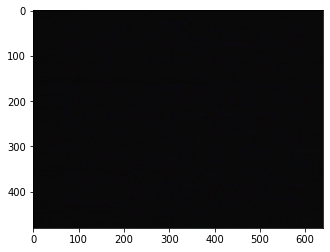

In [5]:
look_img(image)

# 调用摄像头拍摄视频

In [6]:
#调用摄像头拍摄视频模板
#生成的视频文件名默认为output_video.mp4，帧处理函数process_frame()默认不进行任何处理

import cv2
import time

#定义逐帧处理函数，可不做任何处理，直接将摄像头捕捉到的画面写入视频帧
def process_frame(img):
    return img

output_name = 'record_video.mp4'

#获取摄像头
cap = cv2.VideoCapture(0)

#打开cap
cap.open(0)

frame_size = (cap.get(cv2.CAP_PROP_FRAME_WIDTH),cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#fourcc = int(cap.get(cv2.CAP_PROP_FOURCC))
#fourcc = cv2.VideoWriter_fourcc(*'XVID')
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = cap.get(cv2.CAP_PROP_FPS)

out = cv2.VideoWriter(output_name, fourcc=fourcc, fps=fps,frameSize=(int(frame_size[0]),int(frame_size[1])))



#无限循环，直到break被触发
while cap.isOpened():
    success,frame = cap.read()
    if not success:
        break
        
    #对捕捉到的帧进行图像处理
    frame = process_frame(frame)
    
    #将帧写入到视频文件中
    out.write(frame)
    
    #展示处理后的二通道图像
    cv2.imshow('press q to break',frame)
    
    if cv2.waitKey(1) in [ord('q'),27]:    #按键盘上的q或esc退出（在英文输入法下）
        break
        
#关闭摄像头
cap.release()

#关闭图像窗口
cv2.destroyAllWindows()

print('视频已保存',output_name)

视频已保存 record_video.mp4
